<a href="https://colab.research.google.com/github/Jenishhd/DL_Project/blob/chloe/DL_Animals_Model_Chloe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# zip_ref = zipfile.ZipFile('/tmp/archive.zip', 'r') #Opens the zip file in read mode
#####----------------------

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Csulb/Spring 2022 (Last Semester!)/CECS 456 Machine Learning/CECS456_Project/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
len(os.listdir('/content/raw-img/'))

10

In [5]:
print("dogs",len(os.listdir('/content/raw-img/cane')))
print("horse",len(os.listdir('/content/raw-img/cavallo')))
print("elefant",len(os.listdir('/content/raw-img/elefante')))
print("butterfly",len(os.listdir('/content/raw-img/farfalla')))
print("chicken",len(os.listdir('/content/raw-img/gallina')))
print("cat",len(os.listdir('/content/raw-img/gatto')))
print("cow",len(os.listdir('/content/raw-img/mucca')))
print("sheep",len(os.listdir('/content/raw-img/pecora')))
print("spider",len(os.listdir('/content/raw-img/ragno')))
print("squirrel",len(os.listdir('/content/raw-img/scoiattolo')))

dogs 4863
horse 2623
elefant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


In [6]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Splitting into train and test
import shutil

rootdir= '/content/raw-img' #path of the original folder

classes = ['cane', 'cavallo', 'elefante','farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

In [7]:



# for cl in classes:
#     path = os.path.join(rootdir, cl)
#     for im_path in os.listdir(path):
#         img = cv2.imread(os.path.join(path, im_path))
#         plt.imshow(img)
#         break
#     break

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

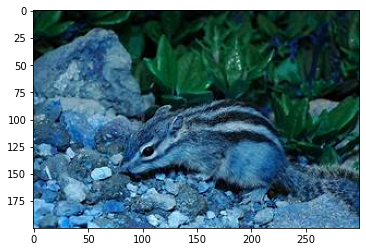

In [8]:

#add to train 
allTrain = []


count = 0
for i in classes:
  rootdir= '/content/raw-img/train'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  # print(len(allFileNames))
  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        # print(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        #X_train_full.append(resized_img)
        allTrain.append([resized_img,count])
        plt.imshow(img)
    except Exception as e:
        pass
    #y_train_full.append(i)
  count += 1

# X_test = []
# y_test = []
allTest = []
#add to test
count = 0
for i in classes:
  rootdir= '/content/raw-img/test'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        # X_test.append(resized_img)
        allTest.append([resized_img,count])
        # plt.imshow(img)
    except Exception as e:
        pass
    # y_test.append(i)
  count += 1

In [9]:
random.shuffle(allTrain)
X_train_full = []
y_train_full = []

print(allTrain[0])
for x, y in allTrain:
  X_train_full.append(x)
  y_train_full.append(y)

random.shuffle(allTest)
X_test = []
y_test = []

for x,y in allTest:
  X_test.append(x)
  y_test.append(y)

[array([[[ 10,  57,  19],
        [ 11,  56,  19],
        [ 12,  56,  20],
        ...,
        [ 11,  73,  25],
        [ 11,  73,  25],
        [ 13,  75,  27]],

       [[ 12,  59,  21],
        [ 13,  58,  21],
        [ 13,  57,  21],
        ...,
        [ 10,  72,  24],
        [ 10,  72,  24],
        [ 12,  74,  26]],

       [[ 14,  61,  23],
        [ 14,  60,  23],
        [ 15,  59,  23],
        ...,
        [  8,  70,  22],
        [  8,  70,  22],
        [ 10,  72,  24]],

       ...,

       [[  4,   8,   3],
        [  2,   6,   1],
        [  0,   6,   1],
        ...,
        [185, 231, 219],
        [178, 227, 215],
        [174, 224, 212]],

       [[  9,  10,   8],
        [  6,  10,   6],
        [  3,   9,   4],
        ...,
        [184, 228, 218],
        [187, 232, 222],
        [190, 237, 226]],

       [[ 44,  43,  42],
        [  4,   4,   3],
        [  8,  10,   8],
        ...,
        [184, 227, 219],
        [191, 233, 225],
        [196, 237, 230]

In [10]:
# import random


for i in y_train_full[:10]:
    print(i)
print(len(X_train_full))
#print(X_train_full[0])


3
7
0
3
0
3
0
0
9
6
19631


In [11]:
X_train_full = np.array(X_train_full).reshape(-1, 224,224, 3)

In [12]:
y_train_full = np.array(y_train_full)

In [13]:
X_test = np.array(X_test).reshape(-1, 224,224, 3)
y_test = np.array(y_test)

In [14]:
print(type(X_train_full),X_train_full.shape)
print(type(y_train_full),y_train_full.shape)

<class 'numpy.ndarray'> (19631, 224, 224, 3)
<class 'numpy.ndarray'> (19631,)


In [15]:

# datagen = keras.preprocessing.image.ImageDataGenerator()
# # load and iterate training dataset
# train_it = datagen.flow_from_directory('raw-img/train', class_mode='binary', batch_size=5000)
# # load and iterate validation dataset
# #val_it = datagen.flow_from_directory('data/validation/', class_mode='binary', batch_size=64)
# # load and iterate test dataset
# test_it = datagen.flow_from_directory('raw-img/test', class_mode='binary', batch_size=5000)

In [16]:
# X_train_full = np.array(X_train_full)#changeg first
# y_train_full = np.array(y_train_full)
# X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
# X_test = X_test

# X_train, X_valid = train_it[:-5000], X_train_full[-5000:] #take last 5000 elements for validation (slicing)
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:] #^  
# X_test = X_test

In [17]:
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [18]:
# X_test[:3]
# for index, image in enumerate(X_new):
#     plt.subplot(1, 3, index + 1)
#     plt.imshow(image, cmap="binary", interpolation="nearest")
#     plt.axis('off')
#   plt.subplots_adjust(wspace=0.2, hspace=0.5)
#   plt.show()

In [19]:
X_train, X_valid = X_train_full[:-2000], X_train_full[-2000:] #take last 5000 elements for validation (slicing)
y_train, y_valid = y_train_full[:-2000], y_train_full[-2000:] #^  
X_test = X_test


In [20]:
X_train_full.shape

(19631, 224, 224, 3)

In [21]:
y_train

array([3, 7, 0, ..., 4, 8, 6])

In [22]:
X_train_full[0]

array([[[ 10,  57,  19],
        [ 11,  56,  19],
        [ 12,  56,  20],
        ...,
        [ 11,  73,  25],
        [ 11,  73,  25],
        [ 13,  75,  27]],

       [[ 12,  59,  21],
        [ 13,  58,  21],
        [ 13,  57,  21],
        ...,
        [ 10,  72,  24],
        [ 10,  72,  24],
        [ 12,  74,  26]],

       [[ 14,  61,  23],
        [ 14,  60,  23],
        [ 15,  59,  23],
        ...,
        [  8,  70,  22],
        [  8,  70,  22],
        [ 10,  72,  24]],

       ...,

       [[  4,   8,   3],
        [  2,   6,   1],
        [  0,   6,   1],
        ...,
        [185, 231, 219],
        [178, 227, 215],
        [174, 224, 212]],

       [[  9,  10,   8],
        [  6,  10,   6],
        [  3,   9,   4],
        ...,
        [184, 228, 218],
        [187, 232, 222],
        [190, 237, 226]],

       [[ 44,  43,  42],
        [  4,   4,   3],
        [  8,  10,   8],
        ...,
        [184, 227, 219],
        [191, 233, 225],
        [196, 237, 230]]

In [23]:
cnn = tf.keras.models.Sequential() #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = "same", input_shape=(224, 224, 3))) #Convolution 1
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = "same"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 3
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pool
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn.add(tf.keras.layers.Flatten()) #Flaterning
cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection1
#tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection2
#tf.keras.layers.Dropout(0.5)
#cnn.add(tf.keras.layers.Dense(units= 1000, activation= "relu"))
#tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [25]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.001)
# cnn.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [26]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [27]:
history = cnn.fit(X_train, y_train, batch_size = 100, epochs=30, validation_data=(X_valid, y_valid)) #try 100 epochs? less than 10 is too small
# history = cnn.fit_generator(steps_per_epoch=100,generator=(X_train,y_train), validation_data= (X_valid,y_valid), validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/30
177/177 [==============================] - 141s 710ms/step - loss: 61.5994 - accuracy: 0.1782 - val_loss: 2.2153 - val_accuracy: 0.1780
Epoch 2/30
177/177 [==============================] - 124s 698ms/step - loss: 2.2405 - accuracy: 0.1813 - val_loss: 2.2229 - val_accuracy: 0.1860
Epoch 3/30
177/177 [==============================] - 124s 698ms/step - loss: 2.2231 - accuracy: 0.1849 - val_loss: 2.2149 - val_accuracy: 0.1860
Epoch 4/30
177/177 [==============================] - 123s 698ms/step - loss: 2.2180 - accuracy: 0.1829 - val_loss: 2.2157 - val_accuracy: 0.1780
Epoch 5/30
177/177 [==============================] - 123s 698ms/step - loss: 2.2078 - accuracy: 0.1853 - val_loss: 2.2159 - val_accuracy: 0.1780
Epoch 6/30
177/177 [==============================] - 123s 698ms/step - loss: 2.2076 - accuracy: 0.1843 - val_loss: 2.2184 - val_accuracy: 0.1860
Epoch 7/30
177/177 [==============================] - 123s 698ms/step - loss: 2.2099 - accuracy: 0.1841 - val_loss: 2.2154 

# **Evaluation**

In [28]:
score = cnn.evaluate(X_test, y_test)

205/205 [==============================] - 17s 79ms/step - loss: 2.2080 - accuracy: 0.1842


In [ ]:
print('Total loss on Testing Set:', score[0])

In [30]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.18417838215827942


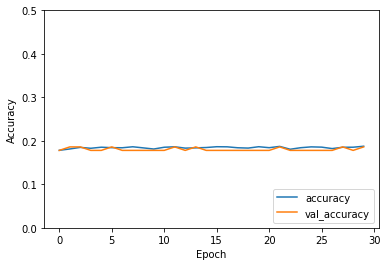

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')


In [32]:
X_new = X_test[:3]
y_proba = cnn.predict(X_new)
y_proba.round(2)

array([[0.18, 0.1 , 0.06, 0.08, 0.12, 0.06, 0.07, 0.07, 0.18, 0.07],
       [0.18, 0.1 , 0.06, 0.08, 0.12, 0.06, 0.07, 0.07, 0.18, 0.07],
       [0.18, 0.1 , 0.06, 0.08, 0.12, 0.06, 0.07, 0.07, 0.18, 0.07]],
      dtype=float32)

In [33]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

array([8, 8, 8])

In [34]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

In [35]:
np.array(classes)[y_pred]

array(['ragno', 'ragno', 'ragno'], dtype='<U10')

In [36]:
y_new = y_test[:3]
y_new

array([9, 0, 1])

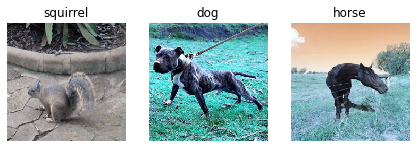

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(translate[classes[y_test[index]]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()